# Modules for Import

In [1]:
import pandas as pd

# !pip install pandasai
# !pip install langchain_community
# !pip install langchain_openai

import os
from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.helpers.openai_info import get_openai_callback
import logging
import openai

from langchain_openai.chat_models import ChatOpenAI

# Create a custom logging configuration
logging.basicConfig(level=logging.CRITICAL)

# Read NBA Stats Data CSV from disk 

In [2]:
# Load your data into a pandas DataFrame
df = pd.read_csv('nba-stats-data.csv', low_memory=False)
# set season (year) as main DF index to allow for time series analysis of player data
df = df.reset_index().set_index('season')
df.index = pd.to_datetime(df.index, format='%Y').to_period('Y')
df = df.sort_index(axis=0)
df.head()

,index,assists,blocks,comment,defReb,fga,fgm,fgp,fta,ftm,...,DOB,age,feet,meters,position,active,jersey_number,years_pro,rookie_year,pounds
season,,,,,,,,,,,,,,,,,,,,,
2015,34,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,35,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,36,2.0,0.0,NaN,7.0,7.0,3.0,42.9,2.0,2.0,...,1988-07-16,36.0,"6""7",2.01,F,True,1.0,9.0,2012.0,237.0
2015,37,0.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,38,1.0,1.0,NaN,5.0,5.0,3.0,60.0,6.0,2.0,...,1992-03-22,33.0,"7""3",2.21,C,False,40.0,1.0,2015.0,265.0


# Analysis: Speak to the Data!

In [3]:
df.columns

Index(['index', 'assists', 'blocks', 'comment', 'defReb', 'fga', 'fgm', 'fgp',
       'fta', 'ftm', 'ftp', 'min', 'offReb', 'pFouls', 'plusMinus', 'points',
       'pos', 'steals', 'totReb', 'tpa', 'tpm', 'tpp', 'turnovers',
       'player_id', 'player_name', 'team_code', 'team_name', 'team_id',
       'game_id', 'affiliation', 'college', 'firstname', 'id', 'lastname',
       'country', 'DOB', 'age', 'feet', 'meters', 'position', 'active',
       'jersey_number', 'years_pro', 'rookie_year', 'pounds'],
      dtype='object')

## Set Open AI API Key

In [4]:
os.environ["OPENAI_API_KEY"] = "*****"

llm = OpenAI(openai_api_key=openai.api_key)
openai = ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_key=openai.api_key)

# Set Large Language Model & other DF confirgurations

In [5]:
df_nba = SmartDataframe(df, config={"llm": llm, "conversational": True, "verbose": True})

In [7]:
df_nba.chat("Which are the top 20 player_names by assists?")

              player_name  assists
season                            
2017          Rajon Rondo     25.0
2018    Russell Westbrook     24.0
2020    Russell Westbrook     24.0
2018    Russell Westbrook     24.0
2020    Russell Westbrook     24.0
2023    Tyrese Haliburton     23.0
2016    Russell Westbrook     22.0
2016    Russell Westbrook     22.0
2024           Trae Young     22.0
2017          Rajon Rondo     21.0
2017    Russell Westbrook     21.0
2020    Russell Westbrook     21.0
2017    Russell Westbrook     21.0
2020    Russell Westbrook     21.0
2018    Russell Westbrook     21.0
2022         James Harden     21.0
2018    Russell Westbrook     21.0
2020    Russell Westbrook     21.0
2024        Elfrid Payton     21.0
2020    Russell Westbrook     21.0


,player_name,assists
season,,
2017,Rajon Rondo,25.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0


# Chat with (query data)

In [8]:
df_nba.chat("Which are the top 10 player_names by assists?")

,player_name,assists
season,,
2017,Rajon Rondo,25.0
2018,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0


In [14]:
df_nba.chat("Which are the top 5 player_names group by points?")

,player_name,points
1167,Kevin Durant,35170.0
1669,Russell Westbrook,33398.0
1220,Kyrie Irving,29574.0
78,Andre Drummond,27846.0
1497,Nikola Vucevic,27172.0


In [15]:
df_nba.chat("Which are the top 5 player_names group by blocks?")

{'type': 'dataframe', 'value':          player_name  blocks
766     JaVale McGee  2648.0
78    Andre Drummond  2478.0
1356   Mason Plumlee  1866.0
1167    Kevin Durant  1640.0
1667     Rudy Gobert  1586.0}


,player_name,blocks
766,JaVale McGee,2648.0
78,Andre Drummond,2478.0
1356,Mason Plumlee,1866.0
1167,Kevin Durant,1640.0
1667,Rudy Gobert,1586.0


In [16]:
df_nba.chat("Which are the top 5 player_names group by assists?")

{'type': 'dataframe', 'value':             player_name  assists
1664  Russell Westbrook  13532.0
1209         Kyle Lowry   9276.0
593        Eric Bledsoe   7404.0
841        James Harden   6952.0
1215       Kyrie Irving   6658.0}


,player_name,assists
1664,Russell Westbrook,13532.0
1209,Kyle Lowry,9276.0
593,Eric Bledsoe,7404.0
841,James Harden,6952.0
1215,Kyrie Irving,6658.0


In [17]:
df_nba.chat("Which are the top 5 distinct player_names by pounds?")

,player_name,pounds
24268,Jusuf Nurkic,290.0
40609,Boban Marjanovic,290.0
24267,Nikola Jokic,284.0
216367,Zion Williamson,284.0
25525,Joel Embiid,280.0


In [18]:
df_nba.chat("Which are the top 5 distinct player_names by meters?")

,player_name,meters
4,Edy Tavares,2.21
16461,Kristaps Porzingis,2.21
40609,Boban Marjanovic,2.21
206575,Bol Bol,2.18
25828,Rudy Gobert,2.16


In [19]:
df_nba.chat("Which are the top 5 player_names group by plusMinus?")

,player_name,plusMinus
1167,Kevin Durant,8420.0
1763,Stephen Curry,5453.0
1220,Kyrie Irving,5234.0
401,Danny Green,5004.0
1214,Kyle Lowry,4852.0


In [21]:
df_nba.chat("Which are the top 5 player_names by all stats excluding pFouls and turnovers?")

,index,assists,blocks,defReb,fga,fgm,fgp,fta,ftm,ftp,...,team_id,game_id,id,age,meters,jersey_number,years_pro,rookie_year,pounds,total_stats
player_name,,,,,,,,,,,,,,,,,,,,,
Norman Powell,706349115,3078.0,543.0,4728.0,19740.0,9177.0,91376.1,5439.0,4506.0,110602.5,...,72555,15541269,998634.0,71331.0,4371.90,55224.0,13806.0,4636515.0,494715.0,7.296182e+08
Alec Burks,497168280,3495.0,405.0,5481.0,15078.0,6201.0,68439.9,4986.0,4122.0,101819.4,...,49170,14186610,162540.0,63855.0,3831.30,9675.0,19350.0,3891285.0,414090.0,5.164466e+08
JaVale McGee,483537388,1216.0,2648.0,7460.0,11980.0,7416.0,146170.4,3408.0,2140.0,79749.6,...,44384,18544508,1036408.0,108632.0,6253.68,0.0,38168.0,5895488.0,792720.0,5.113462e+08
Pascal Siakam,486231160,4826.0,792.0,7044.0,18754.0,9278.0,68422.8,5542.0,4190.0,82276.6,...,50820,11585508,697424.0,45136.0,2955.68,62608.0,7280.0,2935296.0,334880.0,5.029502e+08
Evan Fournier,485077443,4860.0,342.0,4206.0,21393.0,9360.0,74368.5,4521.0,3639.0,99586.8,...,44814,11155605,330813.0,59808.0,3700.62,24297.0,16821.0,3760428.0,383145.0,5.015208e+08


<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,player_name,performance_score
season,,
2022,Donovan Mitchell,77.0
2023,Luka Doncic,77.0
2016,Devin Booker,75.0
2022,Damian Lillard,74.0
2023,Joel Embiid,73.5


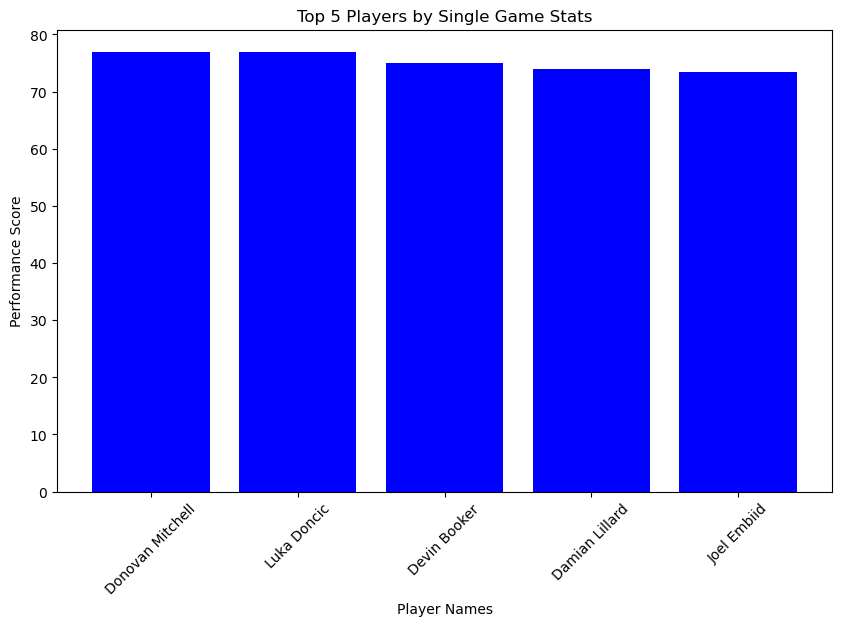

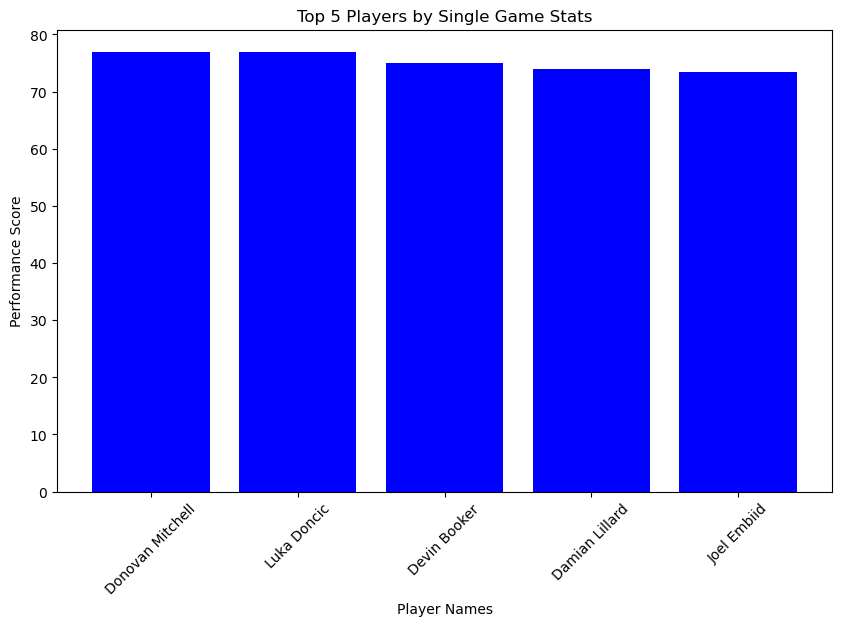

In [22]:
df_nba.chat("Which are the best players by single game stats?")

'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

<Figure size 1000x600 with 0 Axes>

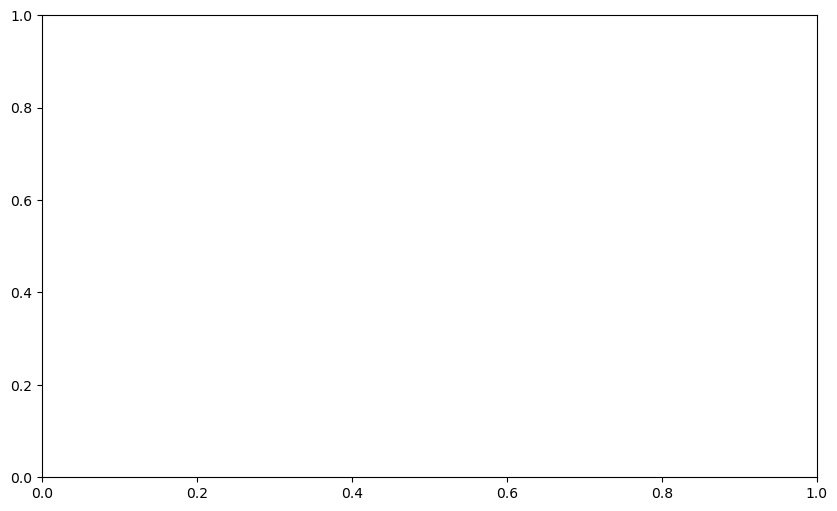

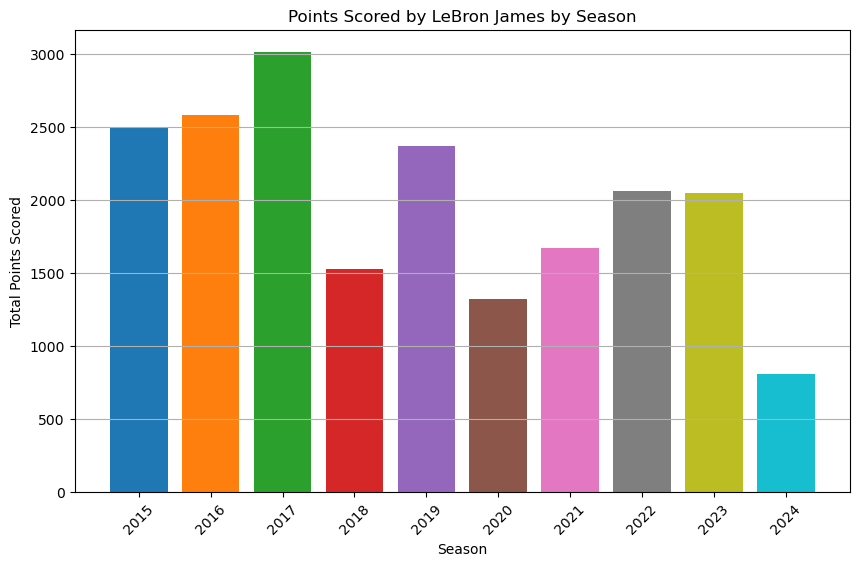

In [23]:
df_nba.chat("Plot the histogram of points scored by LeBron James showing for each season, using different colors for each bar")